In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.replace('-', pd.NA, inplace=True)

In [4]:
for col in ['PYD', 'TD', 'INT', 'Y/A', 'RUSH', 'RATE']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
df['CMP%'] = pd.to_numeric(df['CMP%'].str.rstrip('%'), errors='coerce') / 100

In [6]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df[['PYD', 'TD', 'INT', 'CMP%', 'Y/A', 'RUSH', 'RATE']]), 
                          columns=['PYD', 'TD', 'INT', 'CMP%', 'Y/A', 'RUSH', 'RATE'])

In [7]:
X = df_imputed[['PYD', 'TD', 'CMP%', 'Y/A', 'RUSH']]
y = df_imputed['RATE']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, oob_score=True, warm_start=True, random_state=42)

In [10]:
oob_errors = []
for n_trees in range(1, 101):
    rf_model.set_params(n_estimators=n_trees)
    rf_model.fit(X_train, y_train)
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probab

In [11]:
y_pred = rf_model.predict(X_test)
residuals = y_test - y_pred

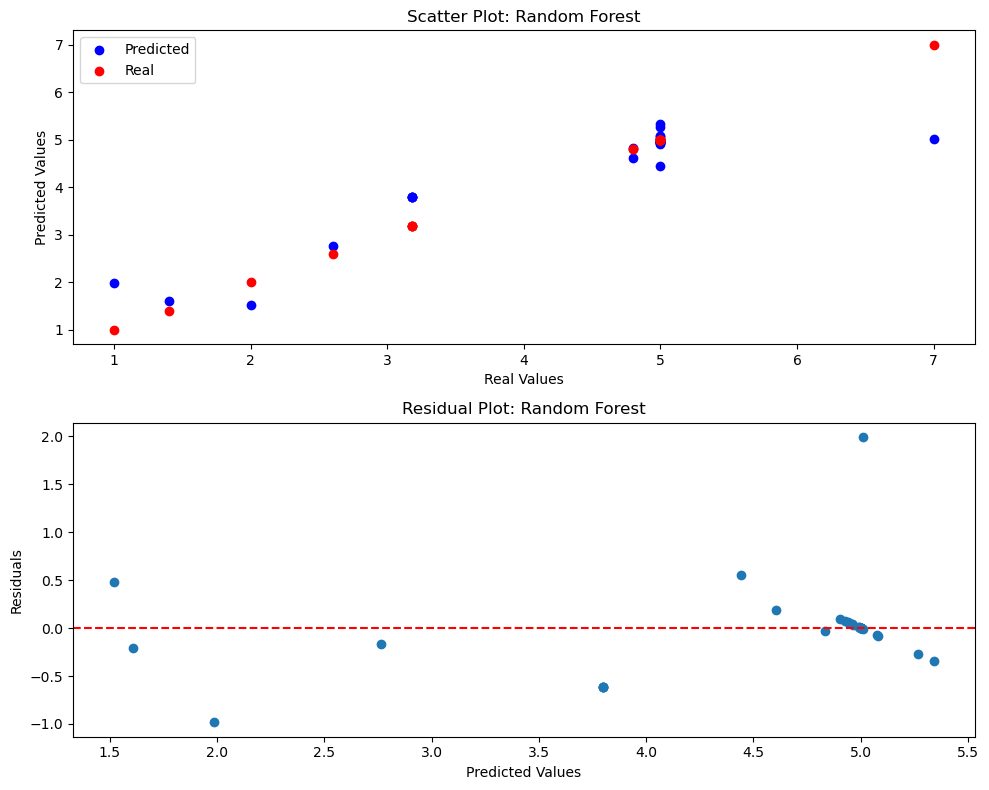

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].scatter(y_test, y_pred, color='blue', label='Predicted')
axes[0].scatter(y_test, y_test, color='red', label='Real')
axes[0].set_xlabel('Real Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Scatter Plot: Random Forest')
axes[0].legend()

axes[1].scatter(y_pred, residuals)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot: Random Forest')
axes[1].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

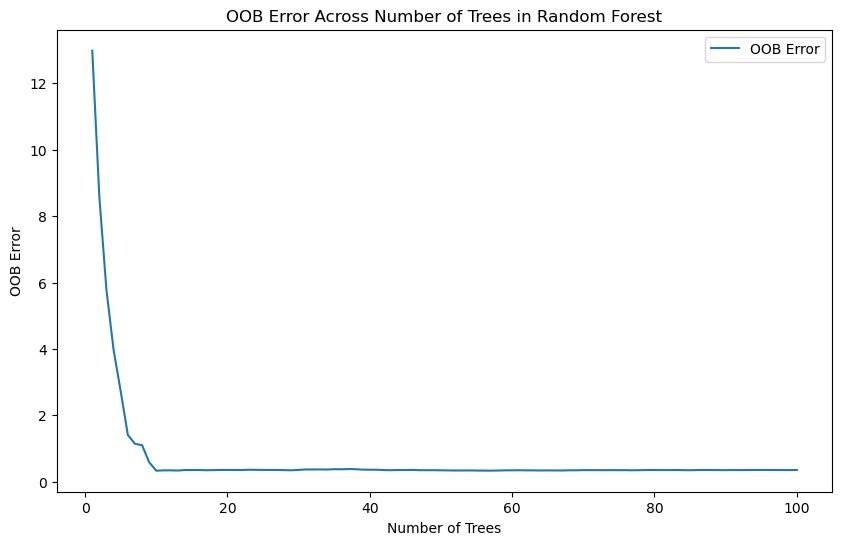

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), oob_errors, label='OOB Error')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error Across Number of Trees in Random Forest')
plt.legend()
plt.show()

In [14]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)

In [15]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [16]:
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest Cross-Validation RMSE (mean): {np.mean(rf_cv_rmse_scores)}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R²: {rf_r2}") 

Random Forest MSE: 0.18806446280991748
Random Forest Cross-Validation RMSE (mean): 0.3560678163172244
Random Forest MAE: 0.21252214452214466
Random Forest R²: 0.8591760639963439


In [17]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']